In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
data = pd.read_csv(r'C:\Users\dhami\Downloads\GitHub_Capstone_Project\CTREA-Dynamics\data\model_building_dataset.csv')
data.head()

,Unnamed: 0,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Reason for sale,Street Number,Minimum Estimated Occupancy
0,0,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,Others,Not defined,230,16
1,1,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,Single Family,Not defined,390,5
2,2,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,Condo,Not defined,5,1
3,3,2020,2021-04-13,Avon,619290.0,890000.0,0.6958,Residential,Single Family,Not defined,111,5
4,4,2020,2021-07-02,Avon,862330.0,1447500.0,0.5957,Residential,Single Family,Not defined,70,5


In [46]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
# Convert 'Date Recorded' to datetime format
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884233 entries, 0 to 884232
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   List Year                    884233 non-null  int64         
 1   Date Recorded                884233 non-null  datetime64[ns]
 2   Town                         884233 non-null  object        
 3   Assessed Value               884233 non-null  float64       
 4   Sale Amount                  884233 non-null  float64       
 5   Sales Ratio                  884233 non-null  float64       
 6   Property Type                884233 non-null  object        
 7   Residential Type             884233 non-null  object        
 8   Reason for sale              884233 non-null  object        
 9   Street Number                884233 non-null  int64         
 10  Minimum Estimated Occupancy  884233 non-null  int64         
dtypes: datetime64[ns](1), floa

In [48]:
numeric_columns = list(data.select_dtypes(exclude='object'))
numeric_columns

['List Year',
 'Date Recorded',
 'Assessed Value',
 'Sale Amount',
 'Sales Ratio',
 'Street Number',
 'Minimum Estimated Occupancy']

## Univariate Analysis

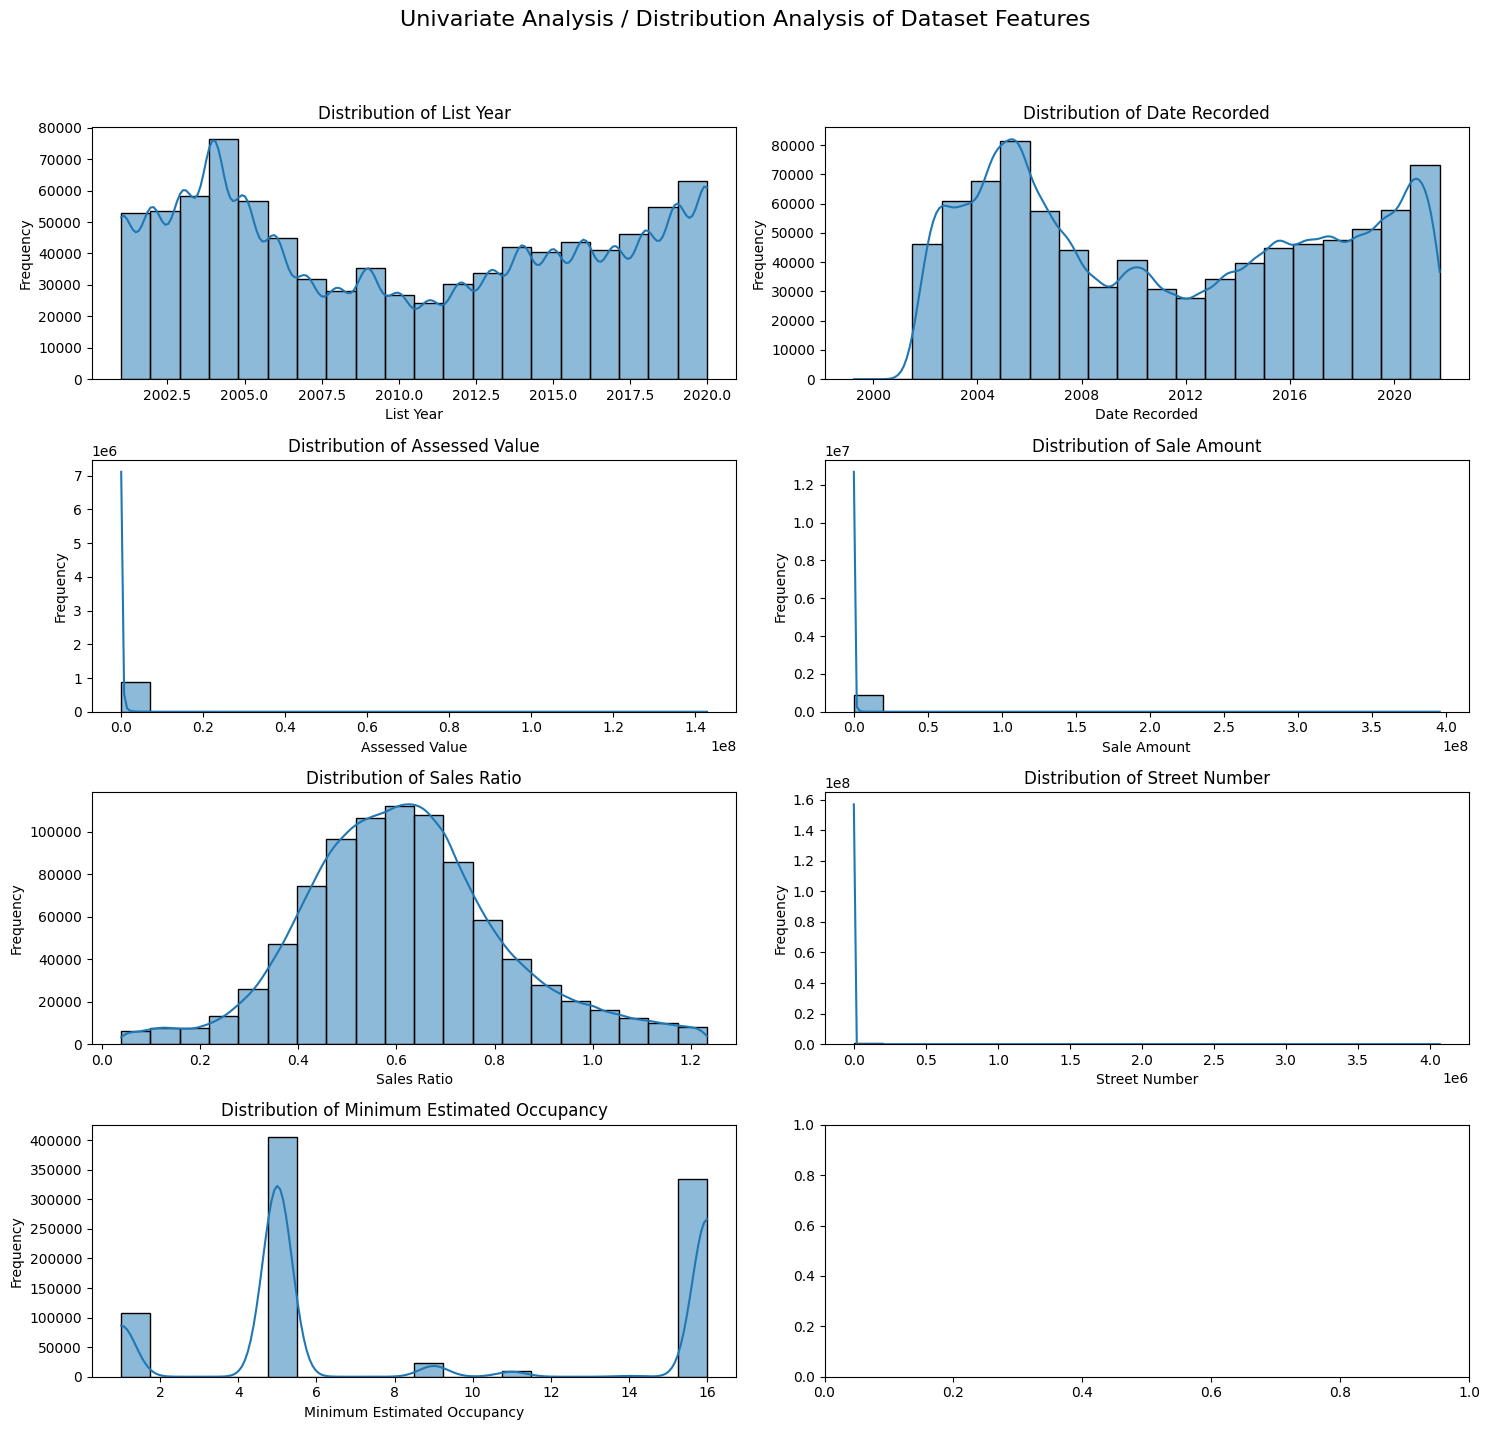

In [49]:
#Univariate Analysis 
# Define the number of rows and columns for subplots
nrows = 4  # Number of rows of subplots
ncols = 2  # Number of columns of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

#Title for univariate using histplot 
fig.suptitle('Univariate Analysis / Distribution Analysis of Dataset Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of the 11 feature names you want to plot
features_to_plot = numeric_columns

# Loop through the features and create subplots
for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    sns.histplot(data[feature], ax=ax, kde=True, bins=20)  # Adjust parameters as needed
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the position of the suptitle
plt.show()

In [50]:
# Extract numerical columns for analysis
numeric_columns = list(data.select_dtypes(exclude='object'))
print('Numerical Features are as follows: ',numeric_columns)

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Column', 'Skewness', 'Kurtosis', 'Skewness Remarks', 'Kurtosis Remarks'])

# Calculate skewness and kurtosis for each numerical column
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        skewness = skew(data[column])
        kurt = kurtosis(data[column])

        # Append results to the new DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({
            'Column': [column],
            'Skewness': [round(skewness,2)],
            'Kurtosis': [round(kurt,2)],
            'Skewness Remarks': ['Left-skewed' if skewness < -0.5 else 'Right-skewed' if skewness > 0.5 else 'Approximately symmetric'],
            'Kurtosis Remarks': ['Leptokurtic' if kurt > 0 else 'Platykurtic' if kurt < 0 else 'Mesokurtic']
        })], ignore_index=True)

Numerical Features are as follows:  ['List Year', 'Date Recorded', 'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Street Number', 'Minimum Estimated Occupancy']


In [51]:
# Display the resulting DataFrame
results_df

,Column,Skewness,Kurtosis,Skewness Remarks,Kurtosis Remarks
0,List Year,0.11,-1.44,Approximately symmetric,Platykurtic
1,Assessed Value,61.50,6747.23,Right-skewed,Leptokurtic
2,Sale Amount,106.33,20976.79,Right-skewed,Leptokurtic
3,Sales Ratio,0.30,0.39,Approximately symmetric,Leptokurtic
4,Street Number,461.96,259127.08,Right-skewed,Leptokurtic
5,Minimum Estimated Occupancy,0.26,-1.64,Approximately symmetric,Platykurtic


## For skewness, a general guideline is:
        If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
        If skewness is less than -0.5, the distribution is left-skewed.
        If skewness is greater than 0.5, the distribution is right-skewed.

## For kurtosis, a general guideline is:
        If kurtosis is close to 0, the distribution has normal tails (mesokurtic).
        If kurtosis is less than 0, the distribution has light tails (platykurtic).
        If kurtosis is greater than 0, the distribution has heavy tails (leptokurtic).

## Univariate Observation :
1. Outliers removed from sales ratio features, approx symmetric, somewhat similar or near to normal distribution is followed.
2. Based on peak, we found multimodal type, more than two peaks are visible for List Year, Date Recorded, Minimum Estimated Occupany
3. Also, Assessed value and sales value followed with street number are right skewed, titling data towards one side as visible in peak achieved wtihin the histogram and kde plot for reference. 

## Bivariate Analysis
### Heatmap 

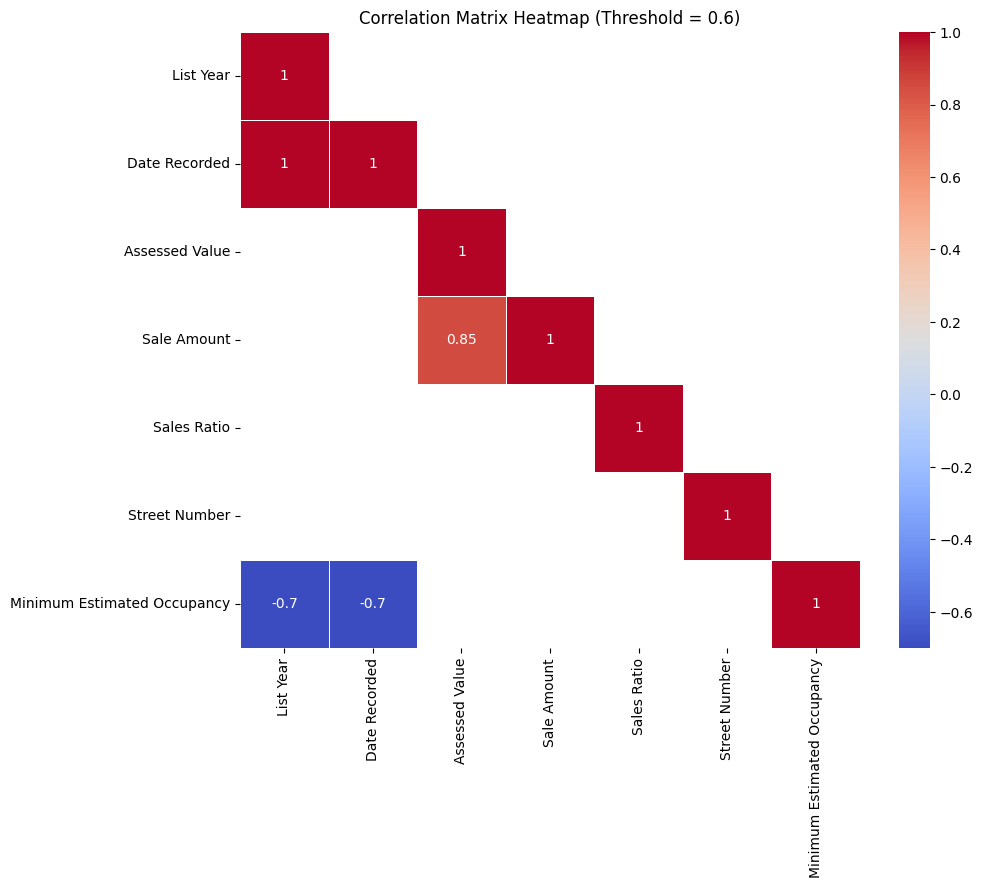

In [52]:
# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Set the threshold for highlighting highly correlated features
threshold = 0.6

# Create a mask to hide the upper triangle of the heatmap
mask = correlation_matrix.abs() <= threshold
mask = mask | np.triu(np.ones(correlation_matrix.shape), k=1)

# Plot the heatmap with highlighted values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title(f'Correlation Matrix Heatmap (Threshold = {threshold})')
plt.show()

### Heatmap Observation
1. Sale Amount and Assessed Value are highly positively correlated features.
2. List Year and Minimum Estimated Occupancy have highly negatively correlated features.
3. Date Recorded and Minimum Estimated Occupancy has highly negatively correlated features.
4. Date Recorded and List Year are perfectly correlated with each other.

### Boxplots

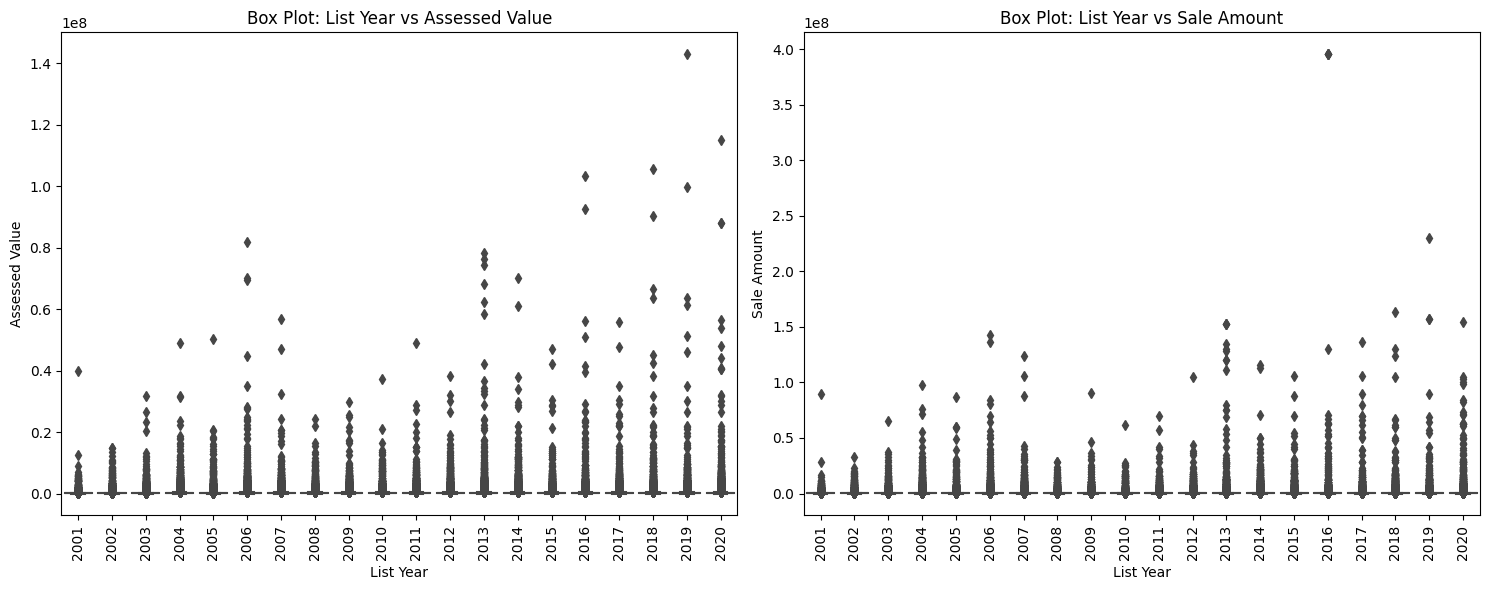

In [53]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Box plot for 'List Year' vs 'Assessed Value'
sns.boxplot(x='List Year', y='Assessed Value', data=data, ax=axes[0])
axes[0].set_title('Box Plot: List Year vs Assessed Value')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Box plot for 'List Year' vs 'Sale Amount'
sns.boxplot(x='List Year', y='Sale Amount', data=data, ax=axes[1])
axes[1].set_title('Box Plot: List Year vs Sale Amount')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Box plots for Sales Amount and Assessed Value vs List Year Observation.
1. The range for Assessed Value is smaller compared to the Sale Amount
2. For Assessed Value, most values were less than 1*le8 till 2014, while in sale amount value seems to be equal to or greater than 1*le8 from 2004.
3. A huge gap before valuation and sales is visible, indicating over-valuation or an increasing trend from visuals.
4. Interesting observations based on global incidents such as the 2008 financial crisis sales and assessed value are near to each other
5. Also, 2019 and 2020 pandemic a decrease or normalization of prices can be observed so valuation and sales are causing a gap, so uncertain times create opportunities that seem to be valid statements.  

### Scatterplot Assesssed Value vs Sale Amouunt

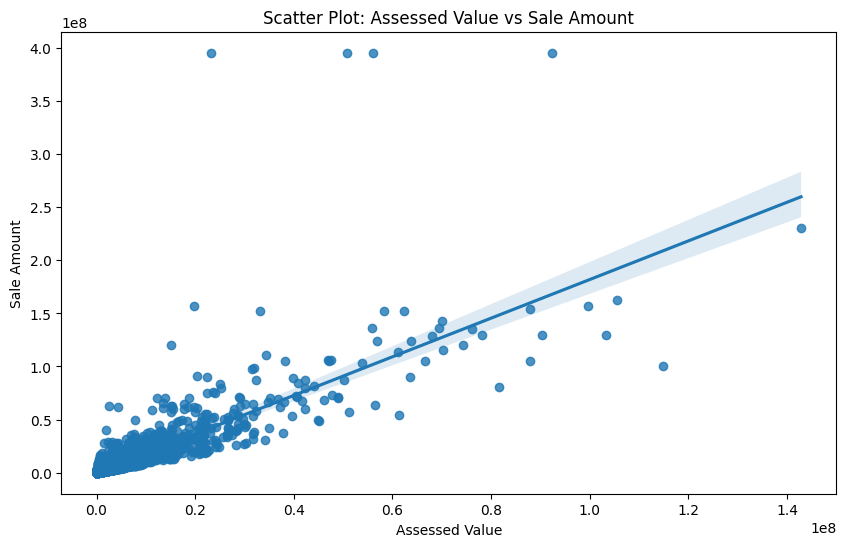

In [54]:
# Example: Scatter plot with regression line for 'Assessed Value' and 'Sale Amount'
plt.figure(figsize=(10, 6))
sns.regplot(x='Assessed Value', y='Sale Amount', data=data)
plt.title('Scatter Plot: Assessed Value vs Sale Amount')
plt.show()

### Scatterplot Observation:
1. Wide Spread: Indicates significant variability in the relationship between 'Assessed Value' and 'Sale Amount.'
2. Lack of Positive, Increasing Trend: No clear increasing trend from left to right, suggesting that higher assessed values do not consistently correspond to higher sale amounts.
3. High Concentration at Initial Values: Points are concentrated at initial values, indicating a substantial number of data points with relatively low assessed values and sale amounts.
4. Presence of Outliers: Outliers suggest data points deviating significantly from the general pattern, representing unique cases.
5. No Clear Linear Relationship: Absence of a clear linear relationship indicates a more complex or nonlinear association between 'Assessed Value' and 'Sale Amount.'

## Multi-Varaiate Analysis

C:\Users\dhami\AppData\Local\Temp\ipykernel_9036\1267123179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering.fillna(features_for_clustering.mean(), inplace=True)


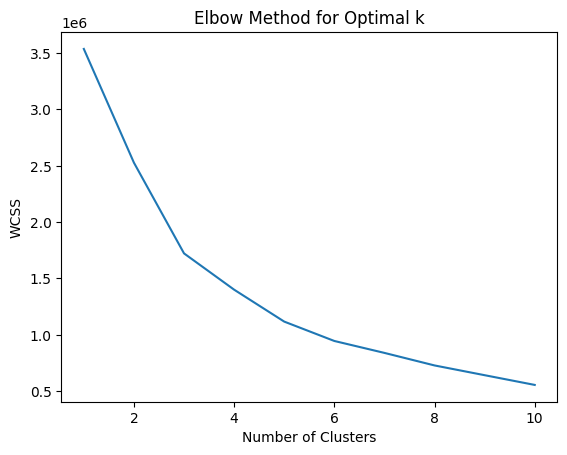

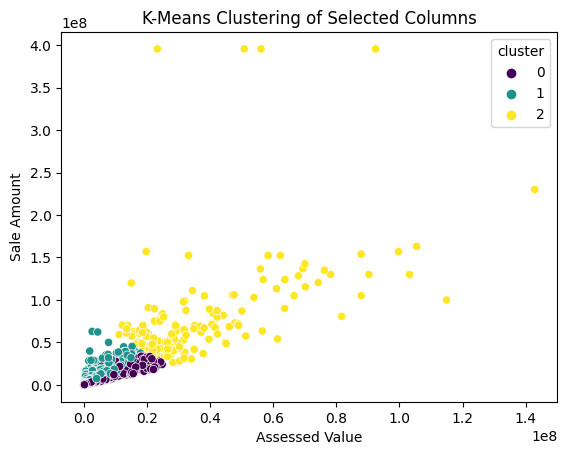

In [55]:
# Assuming 'data' is your DataFrame with the specified columns
selected_columns = ['Assessed Value', 'Sale Amount', 'Sales Ratio', 'Minimum Estimated Occupancy']

# Selecting relevant features for clustering
features_for_clustering = data[selected_columns]

# Handling missing values (you may need to customize this based on your dataset)
features_for_clustering.fillna(features_for_clustering.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_for_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Based on the Elbow method, let's choose an optimal k (number of clusters)
optimal_k = 3

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(features_for_clustering_scaled)

# Visualize the clusters
sns.scatterplot(x='Assessed Value', y='Sale Amount', hue='cluster', data=data, palette='viridis')
plt.title('K-Means Clustering of Selected Columns')
plt.show()


In [56]:
# Calculate mean or median for each variable within each cluster
cluster_characteristics = round(data.groupby('cluster')[selected_columns].mean(),2)
cluster_characteristics

,Assessed Value,Sale Amount,Sales Ratio,Minimum Estimated Occupancy
cluster,,,,
0,259256.44,381633.02,0.71,4.64
1,179090.61,396671.00,0.47,15.53
2,37587529.61,80210999.77,0.53,15.72


# Clustering for Mulivaraite Aanalysis Observation

**Moderate Value Residential:**
- **Avg Assessed Value:** $259,256.
- **Avg Sale Amount:** $381,633.
- **Avg Sales Ratio:** 71% of assessed value.
- **Avg Occupancy:** 4.64.

**Affordable Properties:**
- **Avg Assessed Value:** $179,091.
- **Avg Sale Amount:** $396,671.
- **Avg Sales Ratio:** 47% of assessed value.
- **Avg Occupancy:** 15.53.

**High-Value Properties:**
- **Avg Assessed Value:** $37,587,529.
- **Avg Sale Amount:** $80,210,999.
- **Avg Sales Ratio:** 53% of assessed value.
- **Avg Occupancy:** 15.72.

**Key Insights:**
- **Diverse Property Range:** Encompassing moderate, affordable, and high-value properties.
- **Market Demand:** Cluster of affordable properties shows higher demand, with sale amounts surpassing assessed values.
- **Occupancy Variation:** Indicates diverse property types, with the affordable properties potentially being commercial or multifamily.

## Bar Plot (Multivariate Analysis) Observation

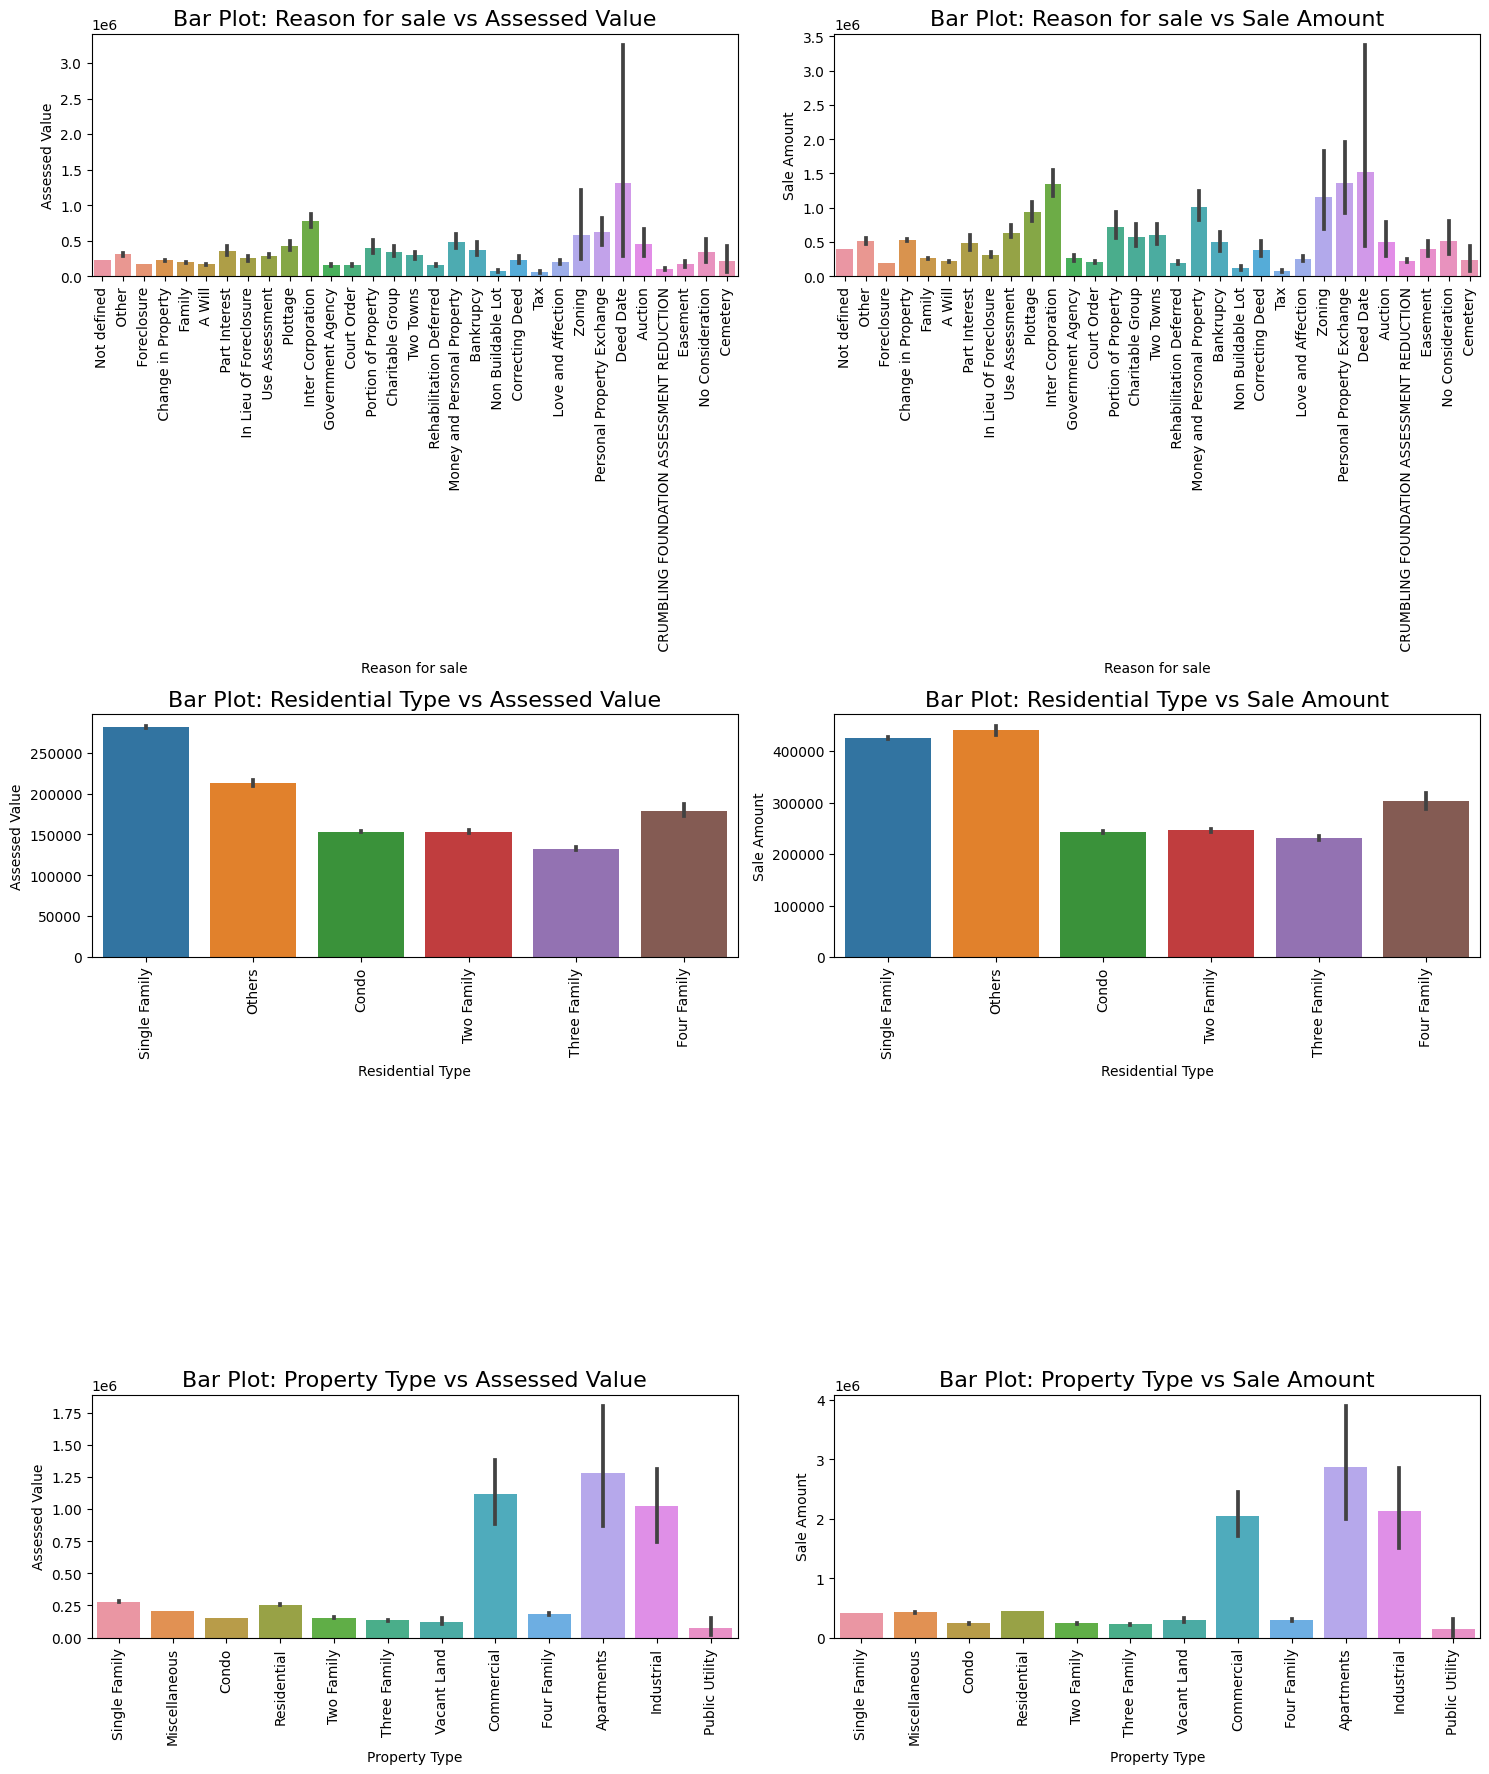

In [59]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

# Bar plot for 'Reason for sale' vs 'Assessed Value' with descending order
reason_order = data['Reason for sale'].value_counts().index
sns.barplot(x='Reason for sale', y='Assessed Value', data=data, order=reason_order, ax=axes[0, 0])
axes[0, 0].set_title('Bar Plot: Reason for sale vs Assessed Value', fontsize=16)  # Increase font size
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Bar plot for 'Reason for sale' vs 'Sale Amount' with descending order
sns.barplot(x='Reason for sale', y='Sale Amount', data=data, order=reason_order, ax=axes[0, 1])
axes[0, 1].set_title('Bar Plot: Reason for sale vs Sale Amount', fontsize=16)  # Increase font size
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Bar plot for 'Residential Type' vs 'Assessed Value' with descending order
residential_order = data['Residential Type'].value_counts().index
sns.barplot(x='Residential Type', y='Assessed Value', data=data, order=residential_order, ax=axes[1, 0])
axes[1, 0].set_title('Bar Plot: Residential Type vs Assessed Value', fontsize=16)  # Increase font size
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Bar plot for 'Residential Type' vs 'Sale Amount' with descending order
sns.barplot(x='Residential Type', y='Sale Amount', data=data, order=residential_order, ax=axes[1, 1])
axes[1, 1].set_title('Bar Plot: Residential Type vs Sale Amount', fontsize=16)  # Increase font size
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Bar plot for 'Property Type' vs 'Assessed Value' with descending order
property_order = data['Property Type'].value_counts().index
sns.barplot(x='Property Type', y='Assessed Value', data=data, order=property_order, ax=axes[2, 0])
axes[2, 0].set_title('Bar Plot: Property Type vs Assessed Value', fontsize=16)  # Increase font size
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Bar plot for 'Property Type' vs 'Sale Amount' with descending order
sns.barplot(x='Property Type', y='Sale Amount', data=data, order=property_order, ax=axes[2, 1])
axes[2, 1].set_title('Bar Plot: Property Type vs Sale Amount', fontsize=16)  # Increase font size
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Barplot (Multi-varaite Analysis) Observation
1. Bar Plot: Reason for sale vs Assessed Value
- 1st Avg Deed Date dominates
- 2nd Avg Inter corporation
2. Bar Plot: Reason for sale vs Sales Amount         
- 1st Avg Deed Date dominates
- 2nd Avg personal property exchange
3. Bar Plot: Residential Type vs Assessed Value
- 1st Avg Single Family dominates
- 2nd Avg others
4. Bar Plot: Residential Type vs Sales Amount         
- 1st Avg Single Family dominates
- 2nd Avg others
5. Bar Plot: Property Type vs Assessed Value
- 1st Avg Apartments dominates
- 2nd Avg Commerical
6. Bar Plot: Property Type vs Sales Amount         
- 1st Avg Apartments dominates
- 2nd Avg Industrial